In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel(r"Manufacturing Industry Data Analysis/full_NBER-CES Manufacturing Industry Database (sic5811).xls")

In [5]:
df.head()

,sic,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4,pctnmfg
0,2011,1958,200.9,1067.8,150.8,309.1,767.7,11950.7,10230.1,1748.6,...,1884.7,0.403,0.343,0.246,0.213,NaN,0.843,NaN,0.843,0.0
1,2011,1959,197.2,1101.0,149.7,312.5,796.9,11788.4,9939.1,1833.2,...,1967.1,0.372,0.321,0.249,0.211,0.033,0.871,0.033,0.871,0.0
2,2011,1960,194.2,1138.6,147.8,312.7,826.2,11806.2,9890.8,1910.7,...,2055.9,0.360,0.326,0.252,0.218,0.049,0.915,0.049,0.915,0.0
3,2011,1961,189.3,1143.2,143.4,302.8,827.4,11916.8,10047.3,1889.2,...,2130.9,0.357,0.318,0.252,0.213,-0.016,0.901,-0.016,0.900,0.0
4,2011,1962,185.6,1161.1,141.7,298.0,844.6,12468.3,10508.8,1986.1,...,2249.8,0.368,0.328,0.255,0.216,0.003,0.903,0.003,0.903,0.0


In [8]:
device_sic = [3693, 3841, 3842, 3843, 3851]  #From Managing the Medical Arms Race

In [9]:
# Dataframe with target device SIC codes
filt = df["sic"].isin(device_sic)
device_df = df.loc[filt]

# Dataframe without target device SIC codes
other_df = df.loc[~filt]

In [10]:
# Group the dataframes by year
device_years = device_df.groupby(["year"])
other_years = other_df.groupby(["year"])

## Annual Change in Median 5-factor Total Factor Productivity

In [11]:
#Produce dictionary of data
device_dtfp5 = {"Medical Device Industry":[], "Other Industries":[]}
for i in range(1959, (2011 + 1)): # +1 because ranges are not inclusive of the last value
    device_dtfp5["Medical Device Industry"].append(device_years.get_group(i)["dtfp5"].median())
    device_dtfp5["Other Industries"].append(other_years.get_group(i)["dtfp5"].median())
    
productivity_df = pd.DataFrame.from_dict(device_dtfp5).set_index(pd.Index(list(range(1959, 2012))))

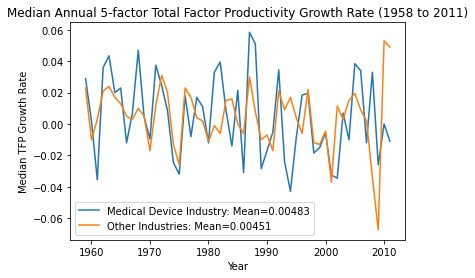

In [13]:
fig, ax = plt.subplots()
plt.plot(productivity_df)
    
plt.legend(["Medical Device Industry: Mean={}".format(str(round(productivity_df["Medical Device Industry"].mean(), 5))), 
            "Other Industries: Mean={}".format(str(round(productivity_df["Other Industries"].mean(), 5)))], 
            loc ="lower left")
plt.xlabel("Year")
plt.ylabel("Median TFP Growth Rate")
plt.title("Median Annual 5-factor Total Factor Productivity Growth Rate (1958 to 2011)")
    
ax.tick_params(labelrotation=0)

plt.show()

## Annual Change in Variable Sums

In [23]:
def plot_function(data_df, title):
    fig, ax = plt.subplots()
    plt.plot(data_df)
    
    plt.legend(["Medical Device Industry Mean: {}%".format(str(round(data_df["Medical Device Industry"].mean(), 2))), 
                "Other Industries Mean: {}%".format(str(round(data_df["Other Industries"].mean(), 2)))], 
               loc ="lower left")
    plt.xlabel("Year")
    plt.ylabel("Percent Change")
    plt.title(title)
    
    ax.tick_params(labelrotation=0)
    
    return(plt.show())

In [16]:
# Sums given varible for each year in device and non-device SIC codes. Returns DF with year-over-year change.
def find_delta_with_sums(column, device_years_inner=device_years, other_years_inner=other_years, start_year=1958, end_year=2011):
    data_dict = {"Medical Device Industry":[], "Other Industries":[]}
    
    device_list = [device_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]  # +1 because ranges are not inclusive of the last value
    other_list = [other_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]
    
    for i in range(len(range(start_year, end_year))):
        data_dict["Medical Device Industry"].append(((device_list[i + 1]/device_list[i])-1)*100)  # Previous year divided by current year for ratio
        data_dict["Other Industries"].append(((other_list[i + 1]/other_list[i])-1)*100)
    
    return pd.DataFrame.from_dict(data_dict).set_index(pd.Index(list(range(start_year+1, end_year+1))))

### Employment

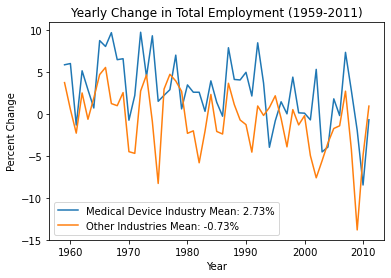

In [24]:
employment_dict = find_delta_with_sums(column="emp")
plot_function(employment_dict, "Yearly Change in Total Employment (1959-2011)")

### Total Payroll

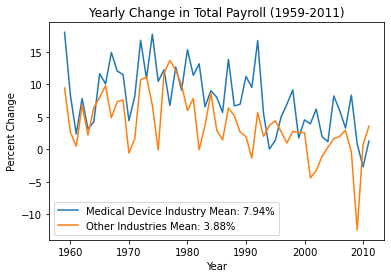

In [25]:
pay_dict = find_delta_with_sums(column="pay")
plot_function(pay_dict, "Yearly Change in Total Payroll (1959-2011)")